# Movie Recommendation System
---

### Fetch Data (TMDB API) and Perform Basic EDA:
 - This Notebook only handles data collection, cleaning and basic EDA insights of data collected.

 #### WorkFlow:
 - Fetch the movie metadata (title, description, genres, poster, rating, streaming link) via TMDB API.
 - Filter the data based on available movies and relevant attributes (genres, ratings, etc.).
 - Perform EDA:
   - Data Validation: 1. Check datatype and format. | 2. Null Values.
   - Statistical Validation: 1. Detect Outliers. | 2. Data Distribution | 3. Identify and remove Duplicates

--- 


In [ ]:
# Import required libraries:

import pandas as pd
import time
from dotenv import load_dotenv
import os
import requests

try:
    if not load_dotenv('api.env'):
        raise FileNotFoundError("api.env file not found. Please check again.")
    
    api_key = os.getenv("TMDB_API_KEY")
    if api_key is None:
        raise ValueError("API KEY is missing. Please get the correct file.")
    
    # Source details:
    url="https://api.themoviedb.org/3/discover/movie"
    total_pages=500
    languages=['en-US','hi-IN']

    # Empty list:
    movie_data = []

    # Start for loop through languages:
    for idx,lang in enumerate(languages):
        print(f"Fetching movies in language: {lang}")

        # Start for loop through pages:
        for page in range(1, total_pages+1):
            params = {
                'api_key': api_key,
                'language': lang,
                'include_adult': 'true',
                'page': page
            }

            try:

                # GET response:
                response = requests.get(url=url,params=params)

                # Handle 429 Too many requests
                # retry_count = 0
                # max_retries = 3

                # while response.status_code == 429 and retry_count < max_retries:
                #     print(f"Rate limit hit {response.status_code}. Sleeping for 60 seconds... Retry {retry_count + 1}/{max_retries}")
                #     time.sleep(60)
                #     response = requests.get(url=url,params=params)
                #     retry_count += 1

                # Now handle successful response    
                if response.status_code == 200:
                    data = response.json()

                    # Start for loop through results:
                    for movie in data['results']:
                        movie_info = {
                            'id': movie['id'],
                            'title': movie['original_title'],
                            'language': movie['original_language'],
                            'description': movie['overview'],
                            'genre_id': movie['genre_ids'],
                            'release_date': movie['release_date'],
                            'rating': movie['vote_average'],
                            'poster_path': movie['poster_path']
                        }

                        # Append into movie_data:
                        movie_data.append(movie_info)

                    # Print amount of data fetched
                    print(f"Fetched pages {page}/{total_pages} in {lang}")

                    # Sleep for a minute once fetched all 500 pages for first language:
                    if page % 499 == 0:
                        print(f"Sleeping off for a minute there....")
                        time.sleep(60)

                    if page % 40 == 0:
                        print(f"\nRespecting rate limit...\n")
                        time.sleep(5)

                else:
                    print(f"Failed to fetch data. Status code {response.status_code} error.")

            except requests.exceptions.RequestException as e:
                print(f"Request failed for page-{page}: {e}")

            # Minor sleep between each request:
            time.sleep(0.5)

        # Pause request once it completes cycle of first language:
        if idx < len(languages) - 1:
            print(f"Completed fetching details of movies of all {page} pages for language {lang}. Sleeping for 90 seconds now.")
            time.sleep(90)
    
    # Create a DataFrame:
    df = pd.DataFrame(movie_data)
    # Save the data into CSV:
    df.to_csv("tmdb_movies.csv", index=False)
    print(f"Successfully saved data in tmdb movies: {len(df)}.")

except Exception as e:
    print(f"An unexcpected error occurred. {e}")
    if movie_data:
        df = pd.DataFrame(movie_data)
        df.to_csv("tmdb_partial_movies.csv", index=False)
        print(f"Partially saved tmdb movies data: {len(df)}.")

Fetching movies in language: en-US
Fetched pages 1/500 in en-US
Fetched pages 2/500 in en-US
Fetched pages 3/500 in en-US
Fetched pages 4/500 in en-US
Fetched pages 5/500 in en-US
Fetched pages 6/500 in en-US
Fetched pages 7/500 in en-US
Fetched pages 8/500 in en-US
Fetched pages 9/500 in en-US
Fetched pages 10/500 in en-US
Fetched pages 11/500 in en-US
Fetched pages 12/500 in en-US
Fetched pages 13/500 in en-US
Fetched pages 14/500 in en-US
Fetched pages 15/500 in en-US
Fetched pages 16/500 in en-US
Fetched pages 17/500 in en-US
Fetched pages 18/500 in en-US
Fetched pages 19/500 in en-US
Fetched pages 20/500 in en-US
Fetched pages 21/500 in en-US
Fetched pages 22/500 in en-US
Fetched pages 23/500 in en-US
Fetched pages 24/500 in en-US
Fetched pages 25/500 in en-US
Fetched pages 26/500 in en-US
Fetched pages 27/500 in en-US
Fetched pages 28/500 in en-US
Fetched pages 29/500 in en-US
Fetched pages 30/500 in en-US
Fetched pages 31/500 in en-US
Fetched pages 32/500 in en-US
Fetched pages 

In [3]:
df.head()

,id,title,language,description,genre_id,release_date,rating,poster_path
0,1233069,Exterritorial,de,"When her son vanishes inside a US consulate, e...","[53, 28]",2025-04-29,6.838,/qWTfHG8KdXwr0bqypYbNZLenh0J.jpg
1,1188808,Tuhog,tl,Abie mourns after the death of Michael. She fi...,"[18, 10749]",2023-11-03,5.000,/1JFMtEk1GRLoCegrcwxkK2XfHcK.jpg
2,1197306,A Working Man,en,Levon Cade left behind a decorated military ca...,"[28, 80, 53]",2025-03-26,6.489,/6FRFIogh3zFnVWn7Z6zcYnIbRcX.jpg
3,1471014,Van Gogh by Vincent,en,"In a career that lasted only ten years, Vincen...",[99],2025-03-26,6.375,/z73X4WKZghBh5fri31o8P6vBEB2.jpg
4,1231813,자매의 스와핑,ko,Sisters Ji-soo and Ji-yeong decided to sell th...,"[10749, 18]",2023-12-19,5.333,/lqjkmFmV62JEUGKK7E1UwX7PDDT.jpg


## Basic EDA:


In [6]:
# Load the dataset:
df = pd.read_csv("tmdb_movies.csv")

# Preview:
df.head()

,id,title,language,description,genre_id,release_date,rating,poster_path
0,1233069,Exterritorial,de,"When her son vanishes inside a US consulate, e...","[53, 28]",2025-04-29,6.838,/qWTfHG8KdXwr0bqypYbNZLenh0J.jpg
1,1188808,Tuhog,tl,Abie mourns after the death of Michael. She fi...,"[18, 10749]",2023-11-03,5.000,/1JFMtEk1GRLoCegrcwxkK2XfHcK.jpg
2,1197306,A Working Man,en,Levon Cade left behind a decorated military ca...,"[28, 80, 53]",2025-03-26,6.489,/6FRFIogh3zFnVWn7Z6zcYnIbRcX.jpg
3,1471014,Van Gogh by Vincent,en,"In a career that lasted only ten years, Vincen...",[99],2025-03-26,6.375,/z73X4WKZghBh5fri31o8P6vBEB2.jpg
4,1231813,자매의 스와핑,ko,Sisters Ji-soo and Ji-yeong decided to sell th...,"[10749, 18]",2023-12-19,5.333,/lqjkmFmV62JEUGKK7E1UwX7PDDT.jpg


In [7]:
# Filter the data to only English and Hindi movies:
df = df[df['language'].isin(['en','hi'])].reset_index(drop=True)

In [8]:
# Data Structure:
print("Data Structure:\n")
df.info()  # To check data types and non-null values

Data Structure:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15538 entries, 0 to 15537
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   id            15538 non-null  int64  
 1   title         15538 non-null  object 
 2   language      15538 non-null  object 
 3   description   8465 non-null   object 
 4   genre_id      15538 non-null  object 
 5   release_date  15517 non-null  object 
 6   rating        15538 non-null  float64
 7   poster_path   15523 non-null  object 
dtypes: float64(1), int64(1), object(6)
memory usage: 971.3+ KB


**Some null values in description, poster_url, release_date.**

In [9]:
# Shape of the data:
print("Shape of data:")
df.shape

Shape of data:


(15538, 8)

In [10]:
# Descriptive Statistics:
print('Descriptive Statistics\n')
df.describe().round()

Descriptive Statistics



,id,rating
count,15538.0,15538.0
mean,298701.0,6.0
std,363516.0,1.0
min,5.0,0.0
25%,10578.0,6.0
50%,77210.0,6.0
75%,512263.0,7.0
max,1471014.0,10.0


### Inisghts:
 - ID - Just a unique identifier column, no issues here.
 - Rating - Ratings fall within the expected scale between 0-10, but some ratings do have 0, might be problematic or possible missing data (will be checked ahead)

## Duplicate Records:

In [11]:
# Check the number of rows in the DataFrame before removing duplicates
print("Before removing duplicates:", len(df))

# Remove duplicate rows based on the 'id' column (keeps the first occurrence)
df.drop_duplicates(subset='id', inplace=True)

# Check the number of rows after removing duplicates to see how many were dropped
print("After removing duplicates:", len(df))

# Resetting the index:
df.reset_index(drop=True, inplace=True)
print("Reset successfull!")

Before removing duplicates: 15538
After removing duplicates: 8263
Reset successfull!


## Missing Values:

In [12]:
# Check for missing values:
print("Missing Values:")
df.isnull().sum()

Missing Values:


id                0
title             0
language          0
description     639
genre_id          0
release_date     11
rating            0
poster_path      10
dtype: int64

**Description, Release Date and Poster Path has some null values and will treat them.**

In [14]:
# Treating null values for Description:
df['description'] = df['description'].fillna("No description available")

# Treating null values for Poster Path:
df = df.dropna(subset=['poster_path', 'release_date'])

# Print output:
print(f"Null values are treated:\n{df.isnull().sum()}\n")

# Will reset the index as have dropped rows:
df.reset_index(drop=True, inplace=True)
print("\nIndex reset!")
print(f"\nNew shape of data: {df.shape}")

Null values are treated:
id              0
title           0
language        0
description     0
genre_id        0
release_date    0
rating          0
poster_path     0
dtype: int64


Index reset!

New shape of data: (8245, 8)


## Outliers:

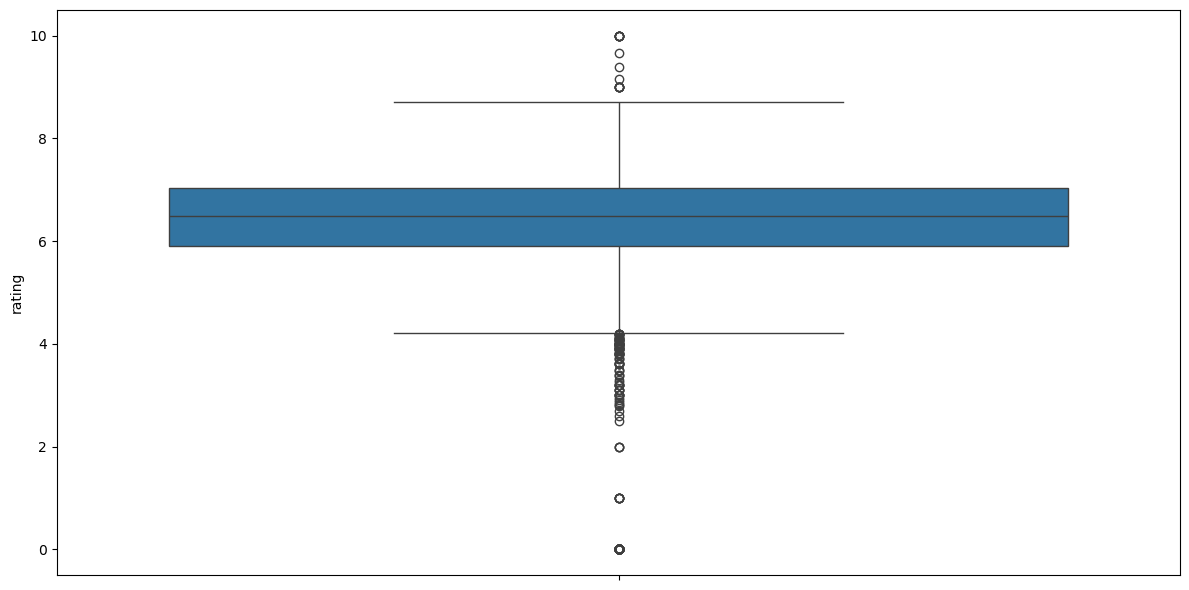

In [15]:
# Visualizing a boxplot for popularity and rating column to find potential outliers:

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12,6))
sns.boxplot(df['rating'])
plt.tight_layout()
plt.show()

#### What This Shows:
 - Median (Q2): Around 6.5, so most movies have average ratings in the 6–7 range.
 - IQR (Interquartile Range): The box spans from about 5.9 to 7.2, showing the middle 50% of ratings.
 - Whiskers: These extend roughly from 4.3 to 8.3, capturing most of the data.

In [16]:
# Converting "Release Date" column to DateTime format:
df['release_date'] = pd.to_datetime(df['release_date'], errors = 'coerce')

# Confirm changes:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8245 entries, 0 to 8244
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   id            8245 non-null   int64         
 1   title         8245 non-null   object        
 2   language      8245 non-null   object        
 3   description   8245 non-null   object        
 4   genre_id      8245 non-null   object        
 5   release_date  8245 non-null   datetime64[ns]
 6   rating        8245 non-null   float64       
 7   poster_path   8245 non-null   object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(5)
memory usage: 515.4+ KB


C:\Users\USER\AppData\Local\Temp\ipykernel_11612\1139951540.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['release_date'] = pd.to_datetime(df['release_date'], errors = 'coerce')


In [17]:
# Check the oldest and latest movie in the data by release date:
df['release_date'].sort_values(ascending=True)

3877   1915-02-08
4041   1916-09-04
5262   1919-05-13
5160   1920-10-01
7797   1921-01-21
          ...    
3291   2026-12-23
3235   2027-03-19
1422   2027-05-05
3538   2027-06-02
6384   2029-12-19
Name: release_date, Length: 8245, dtype: datetime64[ns]

In [19]:
# Checking the oldest and latest movie in the dataset:
old_movie = df['release_date'].sort_values(ascending=True)
latest_movie = df['release_date'].sort_values(ascending=False)

# Print the data:
print(f"Oldest Movie-year in the Dataset:\n{old_movie.iloc[0]}")
print(f"Latest Movie-year in the Dataset:\n{latest_movie.iloc[0]}")

Oldest Movie-year in the Dataset:
1915-02-08 00:00:00
Latest Movie-year in the Dataset:
2029-12-19 00:00:00


### Genre Data:

In [49]:
# Import library:
import requests
from dotenv import load_dotenv
import os

load_dotenv('api.env')
api_key = os.getenv('TMDB_API_KEY')

# Pulling genre_id and name data TMDB API:

url = "https://api.themoviedb.org/3/genre/movie/list"

params = {
    'api_key': api_key
}

genres = []

# GET response:
response = requests.get(url=url, params=params)
if response.status_code == 200:
    data = response.json()

    for genre in data['genres']:
        genre_data = {
            'id': genre['id'],
            'name': genre['name']
        }

        # Append the data:
        genres.append(genre_data)

else:
    print(f"Failed to fetch data. Status code: {response.status_code} error.")

print("Successfully fetched Genre-Data.")
print(genres)

Successfully fetched Genre-Data.
[{'id': 28, 'name': 'Action'}, {'id': 12, 'name': 'Adventure'}, {'id': 16, 'name': 'Animation'}, {'id': 35, 'name': 'Comedy'}, {'id': 80, 'name': 'Crime'}, {'id': 99, 'name': 'Documentary'}, {'id': 18, 'name': 'Drama'}, {'id': 10751, 'name': 'Family'}, {'id': 14, 'name': 'Fantasy'}, {'id': 36, 'name': 'History'}, {'id': 27, 'name': 'Horror'}, {'id': 10402, 'name': 'Music'}, {'id': 9648, 'name': 'Mystery'}, {'id': 10749, 'name': 'Romance'}, {'id': 878, 'name': 'Science Fiction'}, {'id': 10770, 'name': 'TV Movie'}, {'id': 53, 'name': 'Thriller'}, {'id': 10752, 'name': 'War'}, {'id': 37, 'name': 'Western'}]


In [54]:
# Import library:
import pandas as pd

# Load the csv file:
movies = pd.read_csv("tmdb_movies_data.csv", parse_dates=['release_date'])

# Preview:
movies.head()

,id,title,language,description,genre_id,release_date,rating,poster_path
0,1197306,A Working Man,en,Levon Cade left behind a decorated military ca...,"[28, 80, 53]",2025-03-26,6.489,/6FRFIogh3zFnVWn7Z6zcYnIbRcX.jpg
1,1471014,Van Gogh by Vincent,en,"In a career that lasted only ten years, Vincen...",[99],2025-03-26,6.375,/z73X4WKZghBh5fri31o8P6vBEB2.jpg
2,668489,Havoc,en,When a drug heist swerves lethally out of cont...,"[28, 80, 53]",2025-04-24,6.608,/r46leE6PSzLR3pnVzaxx5Q30yUF.jpg
3,950387,A Minecraft Movie,en,Four misfits find themselves struggling with o...,"[10751, 35, 12, 14]",2025-03-31,6.189,/iPPTGh2OXuIv6d7cwuoPkw8govp.jpg
4,986056,Thunderbolts*,en,After finding themselves ensnared in a death t...,"[28, 12, 878]",2025-04-30,7.615,/vnfgoohSwKNOcRfJOPULXTvX0cu.jpg


In [53]:
print(type(movies['genre_id'][0]))  # Should print <class 'list'>

<class 'str'>


In [55]:
# Convert list of genre id: genre name to dictionary to map to df

import ast

genre_map = {
    28: "Action",
    12: "Adventure",
    16: "Animation",
    35: "Comedy",
    80: "Crime",
    99: "Documentary",
    18: "Drama",
    10751: "Family",
    14: "Fantasy",
    36: "History",
    27: "Horror",
    10402: "Music",
    9648: "Mystery",
    10749: "Romance",
    878: "Science Fiction",
    10770: "TV Movie",
    53: "Thriller",
    10752: "War",
    37: "Western"
}

# Convert into list 
movies['genre_id'] = movies['genre_id'].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else x)

# Apply lambda function to map the names of genre as per genre id using genre_map
movies['genres'] = movies['genre_id'].apply(lambda ids: [genre_map.get(i, 'unknown') for i in ids])

In [56]:
movies.head()

,id,title,language,description,genre_id,release_date,rating,poster_path,genres
0,1197306,A Working Man,en,Levon Cade left behind a decorated military ca...,"[28, 80, 53]",2025-03-26,6.489,/6FRFIogh3zFnVWn7Z6zcYnIbRcX.jpg,"[Action, Crime, Thriller]"
1,1471014,Van Gogh by Vincent,en,"In a career that lasted only ten years, Vincen...",[99],2025-03-26,6.375,/z73X4WKZghBh5fri31o8P6vBEB2.jpg,[Documentary]
2,668489,Havoc,en,When a drug heist swerves lethally out of cont...,"[28, 80, 53]",2025-04-24,6.608,/r46leE6PSzLR3pnVzaxx5Q30yUF.jpg,"[Action, Crime, Thriller]"
3,950387,A Minecraft Movie,en,Four misfits find themselves struggling with o...,"[10751, 35, 12, 14]",2025-03-31,6.189,/iPPTGh2OXuIv6d7cwuoPkw8govp.jpg,"[Family, Comedy, Adventure, Fantasy]"
4,986056,Thunderbolts*,en,After finding themselves ensnared in a death t...,"[28, 12, 878]",2025-04-30,7.615,/vnfgoohSwKNOcRfJOPULXTvX0cu.jpg,"[Action, Adventure, Science Fiction]"


In [57]:
# Convert the genre_id and genre_name from list to normal strings:
movies['genre_id'] = movies['genre_id'].apply(lambda x: ", ".join(map(str, x)))
movies['genres'] = movies['genres'].apply(lambda x: ", ".join(x))

In [58]:
# Restoring complete url to poster for poster images:
base_image_url = "https://image.tmdb.org/t/p/original"

# Apply to DataFrame:
movies['poster_path'] = movies['poster_path'].apply(lambda x: base_image_url + x if isinstance(x, str) else None)

# Display the Data:
movies.head()

,id,title,language,description,genre_id,release_date,rating,poster_path,genres
0,1197306,A Working Man,en,Levon Cade left behind a decorated military ca...,"28, 80, 53",2025-03-26,6.489,https://image.tmdb.org/t/p/original/6FRFIogh3z...,"Action, Crime, Thriller"
1,1471014,Van Gogh by Vincent,en,"In a career that lasted only ten years, Vincen...",99,2025-03-26,6.375,https://image.tmdb.org/t/p/original/z73X4WKZgh...,Documentary
2,668489,Havoc,en,When a drug heist swerves lethally out of cont...,"28, 80, 53",2025-04-24,6.608,https://image.tmdb.org/t/p/original/r46leE6PSz...,"Action, Crime, Thriller"
3,950387,A Minecraft Movie,en,Four misfits find themselves struggling with o...,"10751, 35, 12, 14",2025-03-31,6.189,https://image.tmdb.org/t/p/original/iPPTGh2OXu...,"Family, Comedy, Adventure, Fantasy"
4,986056,Thunderbolts*,en,After finding themselves ensnared in a death t...,"28, 12, 878",2025-04-30,7.615,https://image.tmdb.org/t/p/original/vnfgoohSwK...,"Action, Adventure, Science Fiction"


In [60]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8245 entries, 0 to 8244
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   id            8245 non-null   int64         
 1   title         8245 non-null   object        
 2   language      8245 non-null   object        
 3   description   8245 non-null   object        
 4   genre_id      8245 non-null   object        
 5   release_date  8245 non-null   datetime64[ns]
 6   rating        8245 non-null   float64       
 7   poster_path   8245 non-null   object        
 8   genres        8245 non-null   object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(6)
memory usage: 579.9+ KB


In [61]:
# Will save the corrected dataset into a CSV file:
movies.to_csv("tmdb_data.csv", index=False)
print("Successfully saved data as csv")

Successfully saved data as csv


In [62]:
# Import library:
import pandas as pd

# Load the csv file:
movies = pd.read_csv("tmdb_data.csv", parse_dates=['release_date'])

# Preview:
movies.head()

,id,title,language,description,genre_id,release_date,rating,poster_path,genres
0,1197306,A Working Man,en,Levon Cade left behind a decorated military ca...,"28, 80, 53",2025-03-26,6.489,https://image.tmdb.org/t/p/original/6FRFIogh3z...,"Action, Crime, Thriller"
1,1471014,Van Gogh by Vincent,en,"In a career that lasted only ten years, Vincen...",99,2025-03-26,6.375,https://image.tmdb.org/t/p/original/z73X4WKZgh...,Documentary
2,668489,Havoc,en,When a drug heist swerves lethally out of cont...,"28, 80, 53",2025-04-24,6.608,https://image.tmdb.org/t/p/original/r46leE6PSz...,"Action, Crime, Thriller"
3,950387,A Minecraft Movie,en,Four misfits find themselves struggling with o...,"10751, 35, 12, 14",2025-03-31,6.189,https://image.tmdb.org/t/p/original/iPPTGh2OXu...,"Family, Comedy, Adventure, Fantasy"
4,986056,Thunderbolts*,en,After finding themselves ensnared in a death t...,"28, 12, 878",2025-04-30,7.615,https://image.tmdb.org/t/p/original/vnfgoohSwK...,"Action, Adventure, Science Fiction"


In [63]:
# Check the information on the csv file:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8245 entries, 0 to 8244
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   id            8245 non-null   int64         
 1   title         8245 non-null   object        
 2   language      8245 non-null   object        
 3   description   8245 non-null   object        
 4   genre_id      8225 non-null   object        
 5   release_date  8245 non-null   datetime64[ns]
 6   rating        8245 non-null   float64       
 7   poster_path   8245 non-null   object        
 8   genres        8225 non-null   object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(6)
memory usage: 579.9+ KB


In [67]:
movies.isnull().sum()

id               0
title            0
language         0
description      0
genre_id        20
release_date     0
rating           0
poster_path      0
genres          20
dtype: int64

In [69]:
# Fill the data into genre_id and genres:
movies['genres'] = movies['genres'].fillna("Unknown")
movies['genre_id'] = movies['genre_id'].fillna('0')

# Save it back to csv:
movies.to_csv("tmdb_data.csv", index=False)

In [70]:
# Load again and re-check:
movies = pd.read_csv("tmdb_data.csv")

# Check for missing values:
movies.isnull().sum()

id              0
title           0
language        0
description     0
genre_id        0
release_date    0
rating          0
poster_path     0
genres          0
dtype: int64

**All good here, now we fetch the remaining details for the movie to populate it.**

# Fetching more data for movies:

In [73]:
# Import required libraries:

import asyncio
import aiohttp
import pandas as pd
import time
import nest_asyncio
import random
from dotenv import load_dotenv
import os
nest_asyncio.apply()

# API KEY:
load_dotenv('api.env')

api_key = os.getenv("TMDB_API_KEY")

# Containers
cast_list = []
keywords_list = []
providers_list = []

# Semaphore for rate limiting
semaphore = asyncio.Semaphore(4)  # Max 4 requests at a time (TMDB safe limit)

# Retry logic settings
MAX_RETRIES = 3
RETRY_DELAY = [1, 2, 3]  # Random delay between retries (1s, 2s, 3s)

async def fetch_json(session, url, params):
    attempt = 0
    while attempt < MAX_RETRIES:
        async with semaphore:
            try:
                async with session.get(url, params=params) as response:
                    if response.status == 200:
                        return await response.json()
                    else:
                        print(f"Failed fetching {url} with status code {response.status}")
                        attempt += 1
                        if attempt < MAX_RETRIES:
                            wait_time = random.choice(RETRY_DELAY)
                            print(f"Retrying in {wait_time} seconds...")
                            await asyncio.sleep(wait_time)
            except Exception as e:
                print(f"Error fetching {url}: {e}")
                attempt += 1
                if attempt < MAX_RETRIES:
                    wait_time = random.choice(RETRY_DELAY)
                    print(f"Retrying in {wait_time} seconds...")
                    await asyncio.sleep(wait_time)
    return None  # Return None if all retries fail

async def fetch_movie_data(session, movie_id, idx, total):
    global cast_list, keywords_list, providers_list

    print(f"Fetching Movie ID: {movie_id} [{idx+1}/{total}]")

    try:
        # Cast
        cast_url = f"https://api.themoviedb.org/3/movie/{movie_id}/credits"
        cast_data = await fetch_json(session, cast_url, {'api_key': api_key})
        if cast_data:
            cast_info = cast_data.get('cast', [])
            top_cast = [actor['name'] for actor in cast_info[:5]]
            top_cast_profile = [
                f"https://image.tmdb.org/t/p/w200{actor['profile_path']}"
                for actor in cast_info[:5] if actor.get('profile_path')
            ]
            cast_list.append((movie_id, top_cast, top_cast_profile))

        # Keywords
        keywords_url = f"https://api.themoviedb.org/3/movie/{movie_id}/keywords"
        keywords_data = await fetch_json(session, keywords_url, {'api_key': api_key})
        if keywords_data:
            keyword_names = [kw['name'] for kw in keywords_data.get('keywords', [])]
            keywords_list.append((movie_id, keyword_names))

        # Providers
        providers_url = f"https://api.themoviedb.org/3/movie/{movie_id}/watch/providers"
        providers_data = await fetch_json(session, providers_url, {'api_key': api_key})
        if providers_data:
            link = providers_data.get('results', {}).get('IN', {}).get('link')
            providers_list.append((movie_id, link))

    except Exception as e:
        print(f"Error with Movie ID {movie_id}: {e}")

async def main():
    total_movies = len(movies)
    async with aiohttp.ClientSession() as session:
        for i in range(0, total_movies, 400):
            batch = movies['id'].iloc[i:i+400].tolist()
            print(f"\n🚀 Starting batch {i+1} to {i+len(batch)}")
            tasks = [fetch_movie_data(session, movie_id, idx=i+idx, total=total_movies) for idx, movie_id in enumerate(batch)]
            await asyncio.gather(*tasks)
            print(f"✅ Batch {i+1} to {i+len(batch)} complete. Sleeping for 60 seconds...\n")
            await asyncio.sleep(60)  # Respect TMDB limits

    # Save results
    df_cast = pd.DataFrame(cast_list, columns=["id", "top_cast", "cast_profile_path"])
    df_cast.to_csv("cast_data.csv", index=False)
    df_keyword = pd.DataFrame(keywords_list, columns=["id", "keywords"])
    df_keyword.to_csv("keywords_data.csv", index=False)
    df_providers = pd.DataFrame(providers_list, columns=["id", "watch_link"])
    df_providers.to_csv("providers_data.csv", index=False)
    print("🎉 All data fetched and saved.")

# Run the event loop
if __name__ == "__main__":
    start = time.time()
    await main()
    print(f"\n⏱️ Total time taken: {round(time.time() - start, 2)} seconds")



🚀 Starting batch 1 to 400
Fetching Movie ID: 1197306 [1/8245]
Fetching Movie ID: 1471014 [2/8245]
Fetching Movie ID: 668489 [3/8245]
Fetching Movie ID: 950387 [4/8245]
Fetching Movie ID: 986056 [5/8245]
Fetching Movie ID: 1225915 [6/8245]
Fetching Movie ID: 324544 [7/8245]
Fetching Movie ID: 822119 [8/8245]
Fetching Movie ID: 1153714 [9/8245]
Fetching Movie ID: 1180906 [10/8245]
Fetching Movie ID: 1414048 [11/8245]
Fetching Movie ID: 1356236 [12/8245]
Fetching Movie ID: 1233413 [13/8245]
Fetching Movie ID: 1124620 [14/8245]
Fetching Movie ID: 348 [15/8245]
Fetching Movie ID: 769 [16/8245]
Fetching Movie ID: 974573 [17/8245]
Fetching Movie ID: 299537 [18/8245]
Fetching Movie ID: 374720 [19/8245]
Fetching Movie ID: 335984 [20/8245]
Fetching Movie ID: 297762 [21/8245]
Fetching Movie ID: 497698 [22/8245]
Fetching Movie ID: 1092899 [23/8245]
Fetching Movie ID: 1249213 [24/8245]
Fetching Movie ID: 1045938 [25/8245]
Fetching Movie ID: 1195506 [26/8245]
Fetching Movie ID: 762509 [27/8245]
Fet

In [80]:
# Load the csv files:
cast = pd.read_csv("cast_data.csv")
keywords = pd.read_csv("keywords_data.csv")
providers = pd.read_csv("providers_data.csv")

In [81]:
# Cast details:
cast.head()

,id,top_cast,cast_profile_path
0,950387,"['Jason Momoa', 'Jack Black', 'Sebastian Eugen...",['https://image.tmdb.org/t/p/w200/3troAR6QbSb6...
1,1197306,"['Jason Statham', 'Jason Flemyng', 'Merab Nini...",['https://image.tmdb.org/t/p/w200/whNwkEQYWLFJ...
2,986056,"['Florence Pugh', 'Sebastian Stan', 'Julia Lou...",['https://image.tmdb.org/t/p/w200/6Sjz9teWjrMY...
3,1225915,"['Saif Ali Khan', 'Jaideep Ahlawat', 'Nikita D...",['https://image.tmdb.org/t/p/w200/kzOy1DoCeLoK...
4,668489,"['Tom Hardy', 'Jessie Mei Li', 'Timothy Olypha...",['https://image.tmdb.org/t/p/w200/d81K0RH8UX7t...


In [83]:
# Keyword details:
keywords.head()

,id,keywords
0,950387,"['friendship', 'surrealism', 'exploration', 'p..."
1,1197306,"['based on novel or book', 'kidnapping', 'vigi..."
2,986056,"['villain', 'based on comic', 'aftercreditssti..."
3,668489,"['winter', 'detective', 'rescue mission', 'sho..."
4,1153714,"['dark comedy', 'unicorn', 'dark fantasy', 'ho..."


In [85]:
# Providers details:
providers.head()

,id,watch_link
0,668489,https://www.themoviedb.org/movie/668489-havoc/...
1,1153714,NaN
2,950387,NaN
3,1471014,NaN
4,1197306,NaN


In [91]:
# Checking for any missing values:
print(f"Cast:\n{cast.isnull().sum()}\n")
print(f"Keywords:\n{keywords.isnull().sum()}\n")
print(f"Providers:\n{providers.isnull().sum()}\n")

Cast:
id                   0
top_cast             0
cast_profile_path    0
dtype: int64

Keywords:
id          0
keywords    0
dtype: int64

Providers:
id               0
watch_link    2507
dtype: int64



**Watch Link has 2.5k+ missing values and will use fillna to treat it.**

In [92]:
# Treat Missing values:
providers['watch_link'] = providers['watch_link'].fillna("https://www.themoviedb.org/")

# Re-check and confirm changes:
providers.isnull().sum()

id            0
watch_link    0
dtype: int64

In [93]:
# Update this data into the csv file:
providers.to_csv("providers_data.csv", index=False)

# Load it again:
providers = pd.read_csv("providers_data.csv")

# Preview:
providers.head()

,id,watch_link
0,668489,https://www.themoviedb.org/movie/668489-havoc/...
1,1153714,https://www.themoviedb.org/
2,950387,https://www.themoviedb.org/
3,1471014,https://www.themoviedb.org/
4,1197306,https://www.themoviedb.org/


### Merge Data csv's:
 - Merge below csv files into tmdb_data.csv:
   - cast_data.csv
   - keyword_data.csv
   - providers_data.csv

In [ ]:
# Merge all:

movies_final = pd.merge(movies, cast, on='id', how='left')
movies_final = pd.merge(movies_final, keywords, on='id', how='left')
movies_final = pd.merge(movies_final, providers, on='id', how='left')

In [96]:
# Display finalised data:
movies_final.head()

,id,title,language,description,genre_id,release_date,rating,poster_path,genres,top_cast,cast_profile_path,keywords,watch_link
0,1197306,A Working Man,en,Levon Cade left behind a decorated military ca...,"28, 80, 53",2025-03-26,6.489,https://image.tmdb.org/t/p/original/6FRFIogh3z...,"Action, Crime, Thriller","['Jason Statham', 'Jason Flemyng', 'Merab Nini...",['https://image.tmdb.org/t/p/w200/whNwkEQYWLFJ...,"['based on novel or book', 'kidnapping', 'vigi...",https://www.themoviedb.org/
1,1471014,Van Gogh by Vincent,en,"In a career that lasted only ten years, Vincen...",99,2025-03-26,6.375,https://image.tmdb.org/t/p/original/z73X4WKZgh...,Documentary,"['Zahra Ahmadi', 'Jack Etchells', 'Adam Woolle...",['https://image.tmdb.org/t/p/w200/WlF6GWX98ilK...,[],https://www.themoviedb.org/
2,668489,Havoc,en,When a drug heist swerves lethally out of cont...,"28, 80, 53",2025-04-24,6.608,https://image.tmdb.org/t/p/original/r46leE6PSz...,"Action, Crime, Thriller","['Tom Hardy', 'Jessie Mei Li', 'Timothy Olypha...",['https://image.tmdb.org/t/p/w200/d81K0RH8UX7t...,"['winter', 'detective', 'rescue mission', 'sho...",https://www.themoviedb.org/movie/668489-havoc/...
3,950387,A Minecraft Movie,en,Four misfits find themselves struggling with o...,"10751, 35, 12, 14",2025-03-31,6.189,https://image.tmdb.org/t/p/original/iPPTGh2OXu...,"Family, Comedy, Adventure, Fantasy","['Jason Momoa', 'Jack Black', 'Sebastian Eugen...",['https://image.tmdb.org/t/p/w200/3troAR6QbSb6...,"['friendship', 'surrealism', 'exploration', 'p...",https://www.themoviedb.org/
4,986056,Thunderbolts*,en,After finding themselves ensnared in a death t...,"28, 12, 878",2025-04-30,7.615,https://image.tmdb.org/t/p/original/vnfgoohSwK...,"Action, Adventure, Science Fiction","['Florence Pugh', 'Sebastian Stan', 'Julia Lou...",['https://image.tmdb.org/t/p/w200/6Sjz9teWjrMY...,"['villain', 'based on comic', 'aftercreditssti...",https://www.themoviedb.org/


In [107]:
# Converting top_cast, keywords and profile path into strings(out of list)
import ast

movies_final['top_cast'] = movies_final['top_cast'].apply(lambda x: ast.literal_eval(x) if isinstance(x,str) else x)
movies_final['cast_profile_path'] = movies_final['cast_profile_path'].apply(lambda x: ast.literal_eval(x) if isinstance(x,str) else x)
movies_final['keywords'] = movies_final['keywords'].apply(lambda x: ast.literal_eval(x) if isinstance(x,str) else x)

# Remove from lists:
movies_final['top_cast'] = movies_final['top_cast'].apply(lambda x: ', '.join(x) if isinstance(x, list) else '')
movies_final['cast_profile_path'] = movies_final['cast_profile_path'].apply(lambda x: ', '.join(x) if isinstance(x, list) else '')
movies_final['keywords'] = movies_final['keywords'].apply(lambda x: ', '.join(x) if isinstance(x, list) else '')

In [113]:
movies_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8245 entries, 0 to 8244
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 8245 non-null   int64  
 1   title              8245 non-null   object 
 2   language           8245 non-null   object 
 3   description        8245 non-null   object 
 4   genre_id           8245 non-null   object 
 5   release_date       8245 non-null   object 
 6   rating             8245 non-null   float64
 7   poster_path        8245 non-null   object 
 8   genres             8245 non-null   object 
 9   top_cast           8245 non-null   object 
 10  cast_profile_path  8245 non-null   object 
 11  keywords           8245 non-null   object 
 12  watch_link         8245 non-null   object 
dtypes: float64(1), int64(1), object(11)
memory usage: 1.1+ MB


In [120]:
# Fill empty strings:
movies_final['top_cast'] = movies_final['top_cast'].replace('', pd.NA).fillna('not available')
movies_final['keywords'] = movies_final['keywords'].replace('', pd.NA).fillna('other')
movies_final['cast_profile_path'] = movies_final['cast_profile_path'].replace('', pd.NA).fillna("https://image.tmdb.org/")

In [121]:
# Check and confirm:
movies_final[movies_final['keywords'] == '']

,id,title,language,description,genre_id,release_date,rating,poster_path,genres,top_cast,cast_profile_path,keywords,watch_link


In [123]:
import re

def is_hindi(text):
    return bool(re.search('[\u0900-\u097F]', str(text)))  # Devanagari Unicode range

hindi_movies = movies_final[movies_final['title'].apply(is_hindi)]

In [124]:
hindi_movies

,id,title,language,description,genre_id,release_date,rating,poster_path,genres,top_cast,cast_profile_path,keywords,watch_link
5,1225915,ज्वेल थीफ: द हीस्ट बिगिन्स,hi,"In this high-octane battle of wits and wills, ...","28, 53",2025-04-25,6.793,https://image.tmdb.org/t/p/original/eujLbO0kf1...,"Action, Thriller","Saif Ali Khan, Jaideep Ahlawat, Nikita Dutta, ...",https://image.tmdb.org/t/p/w200/kzOy1DoCeLoKJ0...,other,https://www.themoviedb.org/movie/1225915/watch...
86,1195430,देवा,hi,"Dev Ambre, a ruthless cop, loses his memory in...","28, 53, 9648, 80",2025-01-31,6.111,https://image.tmdb.org/t/p/original/qxtXzAlEPx...,"Action, Thriller, Mystery, Crime","Shahid Kapoor, Pooja Hegde, Pavail Gulati, Pra...",https://image.tmdb.org/t/p/w200/q5jqLRioZgIVjX...,"remake, based on movie, bollywood",https://www.themoviedb.org/movie/1195430/watch...
180,1226572,सुपरबॉय्ज़ ऑफ मालेगाँव,hi,The residents of Malegaon look to Bollywood ci...,"35, 18",2025-02-28,7.824,https://image.tmdb.org/t/p/original/l5PDjfWpC9...,"Comedy, Drama","Adarsh Gourav, Shashank Arora, Vineet Kumar Si...",https://image.tmdb.org/t/p/w200/kuJ2ukWmuHnCST...,"filmmaking, bollywood, film about film",https://www.themoviedb.org/movie/1226572/watch...
277,1143407,स्काई फ़ोर्स,hi,"In the 1965 Indo-Pak War, India faces a devast...","28, 53, 10752, 36",2025-01-24,6.600,https://image.tmdb.org/t/p/original/pmtev9YTlI...,"Action, Thriller, War, History","Akshay Kumar, Veer Pahariya, Nimrat Kaur, Sara...",https://image.tmdb.org/t/p/w200/1d77rFiN8h2JXE...,"historical epic, bollywood, indian air force, ...",https://www.themoviedb.org/movie/1143407/watch...
776,1196943,छावा,hi,Shivaji's death sparks the Maratha-Mughal conf...,"36, 28, 18",2025-02-14,6.800,https://image.tmdb.org/t/p/original/ubRsrzb6NR...,"History, Action, Drama","Vicky Kaushal, Rashmika Mandanna, Akshaye Khan...",https://image.tmdb.org/t/p/w200/hKSa4DWEAD7DYh...,"biography, historical drama, 17th century, his...",https://www.themoviedb.org/movie/1196943/watch...
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7942,496331,ब्रह्मास्त्र पहला भाग: शिवा,hi,No description available,"28, 12, 14",2022-09-08,6.400,https://image.tmdb.org/t/p/original/hhZIAirjM8...,"Action, Adventure, Fantasy","Ranbir Kapoor, Alia Bhatt, Mouni Roy, Amitabh ...",https://image.tmdb.org/t/p/w200/ymYNHV9luwgyrw...,"superhero, mythology, astraverse, bollywood",https://www.themoviedb.org/movie/496331/watch?...
7954,4254,कल हो ना हो,hi,No description available,"35, 18, 10749",2003-11-27,7.400,https://image.tmdb.org/t/p/original/h2HQWR7AqB...,"Comedy, Drama, Romance","Shah Rukh Khan, Preity Zinta, Saif Ali Khan, J...",https://image.tmdb.org/t/p/w200/d8jQehnCiGuLhZ...,"new york city, musical, bollywood",https://www.themoviedb.org/movie/4254/watch?lo...
7956,11854,कुछ कुछ होता है,hi,No description available,"10749, 18, 35",1998-10-16,7.500,https://image.tmdb.org/t/p/original/wGuRv4SSRW...,"Romance, Drama, Comedy","Shah Rukh Khan, Kajol, Rani Mukerji, Sana Saee...",https://image.tmdb.org/t/p/w200/d8jQehnCiGuLhZ...,"soulmates, friendship bracelet, love, falling ...",https://www.themoviedb.org/movie/11854/watch?l...
8082,1112426,स्त्री 2: सरकटे का आतंक,hi,No description available,"27, 35",2024-08-15,6.600,https://image.tmdb.org/t/p/original/2NC7sj8rhe...,"Horror, Comedy","Rajkummar Rao, Shraddha Kapoor, Aparshakti Khu...",https://image.tmdb.org/t/p/w200/bCbQkvfnncgsh9...,bollywood,https://www.themoviedb.org/movie/1112426-2/wat...


### Converting Titles in Pure Hindi Language to English:

In [128]:
import requests

def get_english_title(movie_id, api_key):
    url = f"https://api.themoviedb.org/3/movie/{movie_id}/translations?api_key={api_key}"
    response = requests.get(url)
    if response.status_code == 200:
        data = response.json()
        for t in data['translations']:
            if t['iso_639_1'] == 'en':
                return t['data'].get('title', None)
    return None

In [129]:
# Run the function:
for index,row in hindi_movies.iterrows():
    en_title = get_english_title(row['id'],api_key)
    if en_title:
        movies_final.at[index,'title'] = en_title

In [132]:
movies_final[movies_final['id'] == 1225915]

,id,title,language,description,genre_id,release_date,rating,poster_path,genres,top_cast,cast_profile_path,keywords,watch_link
5,1225915,Jewel Thief: The Heist Begins,hi,"In this high-octane battle of wits and wills, ...","28, 53",2025-04-25,6.793,https://image.tmdb.org/t/p/original/eujLbO0kf1...,"Action, Thriller","Saif Ali Khan, Jaideep Ahlawat, Nikita Dutta, ...",https://image.tmdb.org/t/p/w200/kzOy1DoCeLoKJ0...,other,https://www.themoviedb.org/movie/1225915/watch...


In [133]:
# Converting to DateTime:
movies_final['release_date'] = pd.to_datetime(movies_final['release_date'], errors='coerce')

# Save this final data into csv:
movies_final.to_csv("tmdb_movies.csv",index=False)
print("Successful!")

Successful!


In [140]:
# Load the csv:
movies = pd.read_csv("tmdb_movies.csv", parse_dates=['release_date'])

# Preview:
movies.head()

,id,title,language,description,genre_id,release_date,rating,poster_path,genres,top_cast,cast_profile_path,keywords,watch_link,languages
0,1197306,A Working Man,en,Levon Cade left behind a decorated military ca...,"28, 80, 53",2025-03-26,6.489,https://image.tmdb.org/t/p/original/6FRFIogh3z...,"Action, Crime, Thriller","Jason Statham, Jason Flemyng, Merab Ninidze, M...",https://image.tmdb.org/t/p/w200/whNwkEQYWLFJA8...,"based on novel or book, kidnapping, vigilante,...",https://www.themoviedb.org/,English
1,1471014,Van Gogh by Vincent,en,"In a career that lasted only ten years, Vincen...",99,2025-03-26,6.375,https://image.tmdb.org/t/p/original/z73X4WKZgh...,Documentary,"Zahra Ahmadi, Jack Etchells, Adam Woolley, Fra...",https://image.tmdb.org/t/p/w200/WlF6GWX98ilKoa...,other,https://www.themoviedb.org/,English
2,668489,Havoc,en,When a drug heist swerves lethally out of cont...,"28, 80, 53",2025-04-24,6.608,https://image.tmdb.org/t/p/original/r46leE6PSz...,"Action, Crime, Thriller","Tom Hardy, Jessie Mei Li, Timothy Olyphant, Fo...",https://image.tmdb.org/t/p/w200/d81K0RH8UX7tZj...,"winter, detective, rescue mission, shootout, d...",https://www.themoviedb.org/movie/668489-havoc/...,English
3,950387,A Minecraft Movie,en,Four misfits find themselves struggling with o...,"10751, 35, 12, 14",2025-03-31,6.189,https://image.tmdb.org/t/p/original/iPPTGh2OXu...,"Family, Comedy, Adventure, Fantasy","Jason Momoa, Jack Black, Sebastian Eugene Hans...",https://image.tmdb.org/t/p/w200/3troAR6QbSb6nU...,"friendship, surrealism, exploration, portal, m...",https://www.themoviedb.org/,English
4,986056,Thunderbolts*,en,After finding themselves ensnared in a death t...,"28, 12, 878",2025-04-30,7.615,https://image.tmdb.org/t/p/original/vnfgoohSwK...,"Action, Adventure, Science Fiction","Florence Pugh, Sebastian Stan, Julia Louis-Dre...",https://image.tmdb.org/t/p/w200/6Sjz9teWjrMY9l...,"villain, based on comic, aftercreditsstinger, ...",https://www.themoviedb.org/,English


In [141]:
# Convert DateTime to Proper display Date:
movies['release_date'] = movies['release_date'].apply(lambda x: x.strftime('%d %b %Y') if pd.notnull(x) else 'TBD')

In [ ]:
# Add full language string to display:
movies['languages'] = movies['language'].map({'en':'English','hi':'Hindi'})

# Preview changes:
movies.head()

,id,title,language,description,genre_id,release_date,rating,poster_path,genres,top_cast,cast_profile_path,keywords,watch_link,languages
0,1197306,A Working Man,en,Levon Cade left behind a decorated military ca...,"28, 80, 53",2025-03-26,6.489,https://image.tmdb.org/t/p/original/6FRFIogh3z...,"Action, Crime, Thriller","Jason Statham, Jason Flemyng, Merab Ninidze, M...",https://image.tmdb.org/t/p/w200/whNwkEQYWLFJA8...,"based on novel or book, kidnapping, vigilante,...",https://www.themoviedb.org/,English
1,1471014,Van Gogh by Vincent,en,"In a career that lasted only ten years, Vincen...",99,2025-03-26,6.375,https://image.tmdb.org/t/p/original/z73X4WKZgh...,Documentary,"Zahra Ahmadi, Jack Etchells, Adam Woolley, Fra...",https://image.tmdb.org/t/p/w200/WlF6GWX98ilKoa...,other,https://www.themoviedb.org/,English
2,668489,Havoc,en,When a drug heist swerves lethally out of cont...,"28, 80, 53",2025-04-24,6.608,https://image.tmdb.org/t/p/original/r46leE6PSz...,"Action, Crime, Thriller","Tom Hardy, Jessie Mei Li, Timothy Olyphant, Fo...",https://image.tmdb.org/t/p/w200/d81K0RH8UX7tZj...,"winter, detective, rescue mission, shootout, d...",https://www.themoviedb.org/movie/668489-havoc/...,English
3,950387,A Minecraft Movie,en,Four misfits find themselves struggling with o...,"10751, 35, 12, 14",2025-03-31,6.189,https://image.tmdb.org/t/p/original/iPPTGh2OXu...,"Family, Comedy, Adventure, Fantasy","Jason Momoa, Jack Black, Sebastian Eugene Hans...",https://image.tmdb.org/t/p/w200/3troAR6QbSb6nU...,"friendship, surrealism, exploration, portal, m...",https://www.themoviedb.org/,English
4,986056,Thunderbolts*,en,After finding themselves ensnared in a death t...,"28, 12, 878",2025-04-30,7.615,https://image.tmdb.org/t/p/original/vnfgoohSwK...,"Action, Adventure, Science Fiction","Florence Pugh, Sebastian Stan, Julia Louis-Dre...",https://image.tmdb.org/t/p/w200/6Sjz9teWjrMY9l...,"villain, based on comic, aftercreditsstinger, ...",https://www.themoviedb.org/,English


In [143]:
# Save it back into same csv:
movies.to_csv("tmdb_movies.csv", index=False)
print("Saved!")

Saved!


---

### Fetching Trailer data for Movies:

In [8]:
import aiohttp
import asyncio
import pandas as pd
import os
from dotenv import load_dotenv
import time
import nest_asyncio  # Import nest_asyncio

# Allow nested asyncio in Jupyter
nest_asyncio.apply()

# Load the API key
load_dotenv("../TMDB API KEY/api.env")
api_key = os.getenv("TMDB_API_KEY")

# Load movie data
movies = pd.read_csv("../Data/movies_recommend.csv")
total = len(movies['id'])
video_records = []

# Function to fetch trailer info
async def fetch_video_data(session, movie_id, idx, total):
    url = f"https://api.themoviedb.org/3/movie/{movie_id}/videos?api_key={api_key}"
    try:
        async with session.get(url) as response:
            if response.status == 200:
                data = await response.json()
                video_data = data.get("results", [])
                
                # Flag to limit to one trailer
                added_video = False

                for video in video_data:
                    # Accept ANY quality, but only YouTube Trailers
                    if video.get('site') == 'YouTube' and video.get('type') == 'Trailer':
                        if not added_video:
                            video_records.append({
                                'id': movie_id,
                                'video_name': video.get("name"),
                                'video_key': video.get("key"),
                                'site': video.get("site"),
                                'type': video.get("type"),
                                'size': video.get("size"),
                                'official': video.get("official")
                            })
                            added_video = True
                print(f"[{round((idx + 1) / total * 100, 2)}%] Movie ID {movie_id} fetched successfully.")
            else:
                print(f"[{round((idx + 1) / total * 100, 2)}%] Failed to fetch data for Movie ID {movie_id}")
    except Exception as e:
        print(f"[{round((idx + 1) / total * 100, 2)}%] Error fetching movie ID {movie_id}: {e}")

    # Rate limiting
    await asyncio.sleep(0.3)

    if (idx + 1) % 40 == 0:
        print(f"⏳ Rate limit hit after {idx + 1} movies. Sleeping for 60 seconds...")
        await asyncio.sleep(60)

# Main async function
async def main():
    async with aiohttp.ClientSession() as session:
        tasks = []
        for idx, movie_id in enumerate(movies['id']):
            task = asyncio.ensure_future(fetch_video_data(session, movie_id, idx, total))
            tasks.append(task)
        await asyncio.gather(*tasks)

# Run the main function
start_time = time.time()
await main()

# Save data
video_df = pd.DataFrame(video_records)
video_df.to_csv("movie_trailers.csv", index=False)
print("✅ Trailer data saved to 'movie_trailers.csv'. Ready for merging!")

end_time = time.time()
print(f"⏱️ Execution Time: {round(end_time - start_time, 2)} seconds")

[0.06%] Movie ID 986056 fetched successfully.
[0.11%] Movie ID 1153714 fetched successfully.
[0.17%] Movie ID 1124620 fetched successfully.
[0.08%] Movie ID 324544 fetched successfully.
[0.21%] Movie ID 974573 fetched successfully.
[0.3%] Movie ID 1045938 fetched successfully.
[0.01%] Movie ID 1197306 fetched successfully.
[0.27%] Movie ID 497698 fetched successfully.
[0.34%] Movie ID 870028 fetched successfully.
[0.42%] Movie ID 339967 fetched successfully.
[0.38%] Movie ID 346672 fetched successfully.
[0.02%] Movie ID 1471014 fetched successfully.
[0.47%] Movie ID 2108 fetched successfully.
[0.61%] Movie ID 429200 fetched successfully.
[0.49%] Movie ID 1059073 fetched successfully.
[0.58%] Movie ID 1232546 fetched successfully.
[0.12%] Movie ID 1180906 fetched successfully.
[0.7%] Movie ID 533535 fetched successfully.
[0.76%] Movie ID 279 fetched successfully.
[0.84%] Movie ID 473 fetched successfully.
[0.69%] Movie ID 912649 fetched successfully.
[0.62%] Movie ID 1092 fetched succes

In [9]:
trailers = pd.read_csv("movie_trailers.csv")
trailers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7756 entries, 0 to 7755
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   id          7756 non-null   int64 
 1   video_name  7756 non-null   object
 2   video_key   7756 non-null   object
 3   site        7756 non-null   object
 4   type        7756 non-null   object
 5   size        7756 non-null   int64 
 6   official    7756 non-null   bool  
dtypes: bool(1), int64(2), object(4)
memory usage: 371.3+ KB


In [14]:
# Merge the data:
movies_final = pd.merge(movies, trailers, how='left', on='id')
# Save to csv:
movies_final.to_csv("movies_recommended.csv", index=False)
print("✅ Merge complete. Sample rows with trailers:")

✅ Merge complete. Sample rows with trailers:


In [ ]:
# Load the data and clean missing values:
movie = pd.read_csv("movies_recommended.csv")
# Info on data:
movie.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8245 entries, 0 to 8244
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 8245 non-null   int64  
 1   title              8245 non-null   object 
 2   language           8245 non-null   object 
 3   description        8245 non-null   object 
 4   genre_id           8245 non-null   object 
 5   release_date       8245 non-null   object 
 6   rating             8245 non-null   float64
 7   poster_path        8245 non-null   object 
 8   genres             8245 non-null   object 
 9   top_cast           8245 non-null   object 
 10  cast_profile_path  8245 non-null   object 
 11  keywords           8245 non-null   object 
 12  watch_link         8245 non-null   object 
 13  languages          8245 non-null   object 
 14  title_clean        8243 non-null   object 
 15  soup               8245 non-null   object 
 16  cleaned_soup       8245 

In [16]:
# Fillna for trailer data:
def impute(data, columns, fill_value):
    """
    Fills missing values in one or more columns with a given string.
    
    Parameters:
        data (pd.DataFrame): The DataFrame to process.
        columns (str or list): Column name or list of column names.
        fill_value (str): Value to fill in place of NaN.
        
    Returns:
        pd.Series: Null counts in the specified columns after imputation.
    """
    if isinstance(columns, str):
        columns = [columns]
        
    for column in columns:
        data[column] = data[column].fillna(fill_value)
        
    return data[columns].isnull().sum()

In [ ]:
# Fillna using the defined function:
impute(movie,['video_name','video_key','site','type','official'],'Not Available')
impute(movie,'size', 0.0)

size    0
dtype: int64

In [21]:
# Re-check missing values:
movie.isnull().sum()

id                   0
title                0
language             0
description          0
genre_id             0
release_date         0
rating               0
poster_path          0
genres               0
top_cast             0
cast_profile_path    0
keywords             0
watch_link           0
languages            0
title_clean          0
soup                 0
cleaned_soup         0
cleaned_top_cast     0
cleaned_cast         0
final_soup           0
video_name           0
video_key            0
site                 0
type                 0
size                 0
official             0
dtype: int64

In [22]:
# Save updated data:
movie.to_csv("movies_recommended.csv", index=False)
print("Updated data saved to csv.")

Updated data saved to csv.
